In [ ]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from itertools import product
import torch
import numpy as np
from matplotlib.patches import FancyArrowPatch
import mlflow
mlflow.set_experiment("Moons Neural ODE Experiment")

from even_flow.moons.jobs import MoonsTimeEmbeddinngMLPNeuralODEJob
from even_flow.utils import flatten_dict

# Params

In [2]:
rtols = np.logspace(-2, -7, 10)
atols = np.logspace(-2, -7, 10)
solvers = ['euler', 'dopri5', 'rk4']
# rtols = [1e-6]
# atols = [1e-6]
# solvers = ['dopri5']
random_state = 42
noise = 0.05

# Dataset Example

In [3]:
X, y = make_moons(n_samples=5000, noise=0.05, random_state=random_state)
dataset_example = pd.DataFrame(
    {'x': X[:, 0], 'y': X[:, 1], 'Label': y }
)
del X, y
dataset_example.head()

,x,y,Label
0,-0.215309,0.993641,0
1,0.019770,0.320730,1
2,0.028542,0.319588,1
3,0.232153,1.001904,0
4,0.688391,0.733807,0


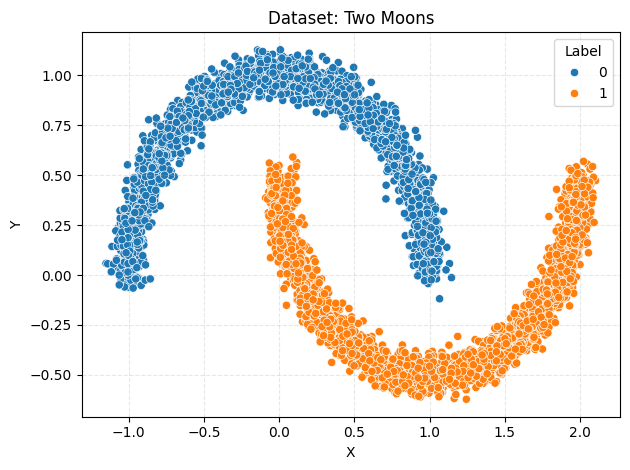

In [4]:
fig, ax = plt.subplots()
ax.grid(alpha=.3, linestyle='--')
sns.scatterplot(
    dataset_example,
    x='x',
    y='y',
    hue='Label',
    ax=ax
)
ax.set(
    title='Dataset: Two Moons',
    xlabel='X',
    ylabel='Y'
)
fig.tight_layout()

# Execution

In [5]:
jobs = [
    MoonsTimeEmbeddinngMLPNeuralODEJob(
        datamodule={
            'random_state': random_state,
            'batch_size': 32,
            'noise': noise
        },
        name=f'time-embedding-mlp-neural-ode-{i}',
        max_epochs=3,
        model={
            'n_classes': 2,
            'input_dims': 2,
            'time_embed_dims': 2,
            'time_embed_freq': 10,
            'neurons_per_layer': [4, 4, 2],
            'activations': ['relu']*3,
            'atol': atol,
            'rtol': rtol,
            'solver': solver
        },
        monitor='val_loss',
        verbose=False
    ) for i, (rtol, atol, solver) in enumerate(product(rtols, atols, solvers))
]
print(f'Running {len(jobs)} jobs.')

Running 300 jobs.


In [6]:
for job in jobs:
    print(f'Runnning job: {job.name} | Solver: {job.model.solver} | rtol: {job.model.rtol} | atol: {job.model.atol}')
    job.run()
jobs_df = pd.DataFrame.from_records([
    flatten_dict(job.model_dump())
    for job in jobs
])
jobs_df.head()

/home/lucasbanunes/workspaces/even-flow-pearl-jam.mp3/.venv/lib/python3.12/site-packages/mlflow/tracking/_tracking_service/utils.py:140: FutureWarning: Filesystem tracking backend (e.g., './mlruns') is deprecated. Please switch to a database backend (e.g., 'sqlite:///mlflow.db'). For feedback, see: https://github.com/mlflow/mlflow/issues/18534
  return FileStore(store_uri, store_uri)
GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function       | BCEWithLogitsLoss | 0      | train | ?            | ?        
3 | train_metrics       | MetricCollection  | 0      | train | ?            | ?        
4 |

Runnning job: time-embedding-mlp-neural-ode-0 | Solver: euler | rtol: 0.01 | atol: 0.01


/home/lucasbanunes/workspaces/even-flow-pearl-jam.mp3/.venv/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:433: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/home/lucasbanunes/workspaces/even-flow-pearl-jam.mp3/.venv/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:433: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/home/lucasbanunes/workspaces/even-flow-pearl-jam.mp3/.venv/lib/python3.12/site-packages/lightning/pytorch/loops/fit_loop.py:310: The number of training batches (32) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs fo

Runnning job: time-embedding-mlp-neural-ode-1 | Solver: dopri5 | rtol: 0.01 | atol: 0.01


/home/lucasbanunes/workspaces/even-flow-pearl-jam.mp3/.venv/lib/python3.12/site-packages/lightning/pytorch/loops/fit_loop.py:310: The number of training batches (32) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:04:30 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:04:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params 

Runnning job: time-embedding-mlp-neural-ode-2 | Solver: rk4 | rtol: 0.01 | atol: 0.01


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:04:36 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:04:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-3 | Solver: euler | rtol: 0.01 | atol: 0.0027825594022071257


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:04:40 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:04:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-4 | Solver: dopri5 | rtol: 0.01 | atol: 0.0027825594022071257


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:04:46 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:04:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-5 | Solver: rk4 | rtol: 0.01 | atol: 0.0027825594022071257


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:04:52 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:04:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-6 | Solver: euler | rtol: 0.01 | atol: 0.000774263682681127


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:04:57 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:04:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-7 | Solver: dopri5 | rtol: 0.01 | atol: 0.000774263682681127


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:05:04 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:05:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-8 | Solver: rk4 | rtol: 0.01 | atol: 0.000774263682681127


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:05:09 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:05:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-9 | Solver: euler | rtol: 0.01 | atol: 0.00021544346900318823


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:05:14 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:05:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-10 | Solver: dopri5 | rtol: 0.01 | atol: 0.00021544346900318823


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:05:20 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:05:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-11 | Solver: rk4 | rtol: 0.01 | atol: 0.00021544346900318823


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:05:25 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:05:25 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-12 | Solver: euler | rtol: 0.01 | atol: 5.994842503189409e-05


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:05:30 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:05:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-13 | Solver: dopri5 | rtol: 0.01 | atol: 5.994842503189409e-05


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:05:36 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:05:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-14 | Solver: rk4 | rtol: 0.01 | atol: 5.994842503189409e-05


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:05:41 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:05:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-15 | Solver: euler | rtol: 0.01 | atol: 1.6681005372000593e-05


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:05:45 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:05:45 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-16 | Solver: dopri5 | rtol: 0.01 | atol: 1.6681005372000593e-05


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:05:52 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:05:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-17 | Solver: rk4 | rtol: 0.01 | atol: 1.6681005372000593e-05


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:05:57 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:05:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-18 | Solver: euler | rtol: 0.01 | atol: 4.641588833612773e-06


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:06:01 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:06:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-19 | Solver: dopri5 | rtol: 0.01 | atol: 4.641588833612773e-06


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:06:08 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:06:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-20 | Solver: rk4 | rtol: 0.01 | atol: 4.641588833612773e-06


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:06:12 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:06:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-21 | Solver: euler | rtol: 0.01 | atol: 1.2915496650148827e-06


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:06:17 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:06:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-22 | Solver: dopri5 | rtol: 0.01 | atol: 1.2915496650148827e-06


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:06:24 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:06:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-23 | Solver: rk4 | rtol: 0.01 | atol: 1.2915496650148827e-06


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:06:29 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:06:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-24 | Solver: euler | rtol: 0.01 | atol: 3.5938136638046254e-07


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:06:33 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:06:33 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-25 | Solver: dopri5 | rtol: 0.01 | atol: 3.5938136638046254e-07


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:06:40 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:06:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-26 | Solver: rk4 | rtol: 0.01 | atol: 3.5938136638046254e-07


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:06:45 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:06:45 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-27 | Solver: euler | rtol: 0.01 | atol: 1e-07


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:06:49 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:06:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-28 | Solver: dopri5 | rtol: 0.01 | atol: 1e-07


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:06:57 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:06:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-29 | Solver: rk4 | rtol: 0.01 | atol: 1e-07


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:07:02 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:07:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-30 | Solver: euler | rtol: 0.0027825594022071257 | atol: 0.01


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:07:06 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:07:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-31 | Solver: dopri5 | rtol: 0.0027825594022071257 | atol: 0.01


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:07:14 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:07:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-32 | Solver: rk4 | rtol: 0.0027825594022071257 | atol: 0.01


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:07:19 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:07:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-33 | Solver: euler | rtol: 0.0027825594022071257 | atol: 0.0027825594022071257


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:07:23 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:07:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-34 | Solver: dopri5 | rtol: 0.0027825594022071257 | atol: 0.0027825594022071257


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:07:31 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:07:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-35 | Solver: rk4 | rtol: 0.0027825594022071257 | atol: 0.0027825594022071257


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:07:36 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:07:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-36 | Solver: euler | rtol: 0.0027825594022071257 | atol: 0.000774263682681127


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:07:40 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:07:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-37 | Solver: dopri5 | rtol: 0.0027825594022071257 | atol: 0.000774263682681127


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:07:46 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:07:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-38 | Solver: rk4 | rtol: 0.0027825594022071257 | atol: 0.000774263682681127


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:07:51 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:07:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-39 | Solver: euler | rtol: 0.0027825594022071257 | atol: 0.00021544346900318823


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:07:55 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:07:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-40 | Solver: dopri5 | rtol: 0.0027825594022071257 | atol: 0.00021544346900318823


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:08:01 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:08:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-41 | Solver: rk4 | rtol: 0.0027825594022071257 | atol: 0.00021544346900318823


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:08:06 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:08:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-42 | Solver: euler | rtol: 0.0027825594022071257 | atol: 5.994842503189409e-05


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:08:10 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:08:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-43 | Solver: dopri5 | rtol: 0.0027825594022071257 | atol: 5.994842503189409e-05


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:08:18 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:08:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-44 | Solver: rk4 | rtol: 0.0027825594022071257 | atol: 5.994842503189409e-05


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:08:23 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:08:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-45 | Solver: euler | rtol: 0.0027825594022071257 | atol: 1.6681005372000593e-05


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:08:27 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:08:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-46 | Solver: dopri5 | rtol: 0.0027825594022071257 | atol: 1.6681005372000593e-05


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:08:34 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:08:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-47 | Solver: rk4 | rtol: 0.0027825594022071257 | atol: 1.6681005372000593e-05


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:08:39 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:08:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-48 | Solver: euler | rtol: 0.0027825594022071257 | atol: 4.641588833612773e-06


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:08:43 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:08:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-49 | Solver: dopri5 | rtol: 0.0027825594022071257 | atol: 4.641588833612773e-06


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:08:51 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:08:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-50 | Solver: rk4 | rtol: 0.0027825594022071257 | atol: 4.641588833612773e-06


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:08:56 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:08:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-51 | Solver: euler | rtol: 0.0027825594022071257 | atol: 1.2915496650148827e-06


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:09:00 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:09:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-52 | Solver: dopri5 | rtol: 0.0027825594022071257 | atol: 1.2915496650148827e-06


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:09:07 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:09:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-53 | Solver: rk4 | rtol: 0.0027825594022071257 | atol: 1.2915496650148827e-06


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:09:12 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:09:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-54 | Solver: euler | rtol: 0.0027825594022071257 | atol: 3.5938136638046254e-07


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:09:16 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:09:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-55 | Solver: dopri5 | rtol: 0.0027825594022071257 | atol: 3.5938136638046254e-07


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:09:23 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:09:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-56 | Solver: rk4 | rtol: 0.0027825594022071257 | atol: 3.5938136638046254e-07


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:09:28 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:09:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-57 | Solver: euler | rtol: 0.0027825594022071257 | atol: 1e-07


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:09:33 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:09:33 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-58 | Solver: dopri5 | rtol: 0.0027825594022071257 | atol: 1e-07


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:09:41 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:09:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-59 | Solver: rk4 | rtol: 0.0027825594022071257 | atol: 1e-07


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:09:46 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:09:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-60 | Solver: euler | rtol: 0.000774263682681127 | atol: 0.01


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:09:50 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:09:50 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-61 | Solver: dopri5 | rtol: 0.000774263682681127 | atol: 0.01


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:09:57 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:09:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-62 | Solver: rk4 | rtol: 0.000774263682681127 | atol: 0.01


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:10:01 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:10:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-63 | Solver: euler | rtol: 0.000774263682681127 | atol: 0.0027825594022071257


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:10:05 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:10:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-64 | Solver: dopri5 | rtol: 0.000774263682681127 | atol: 0.0027825594022071257


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:10:11 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:10:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-65 | Solver: rk4 | rtol: 0.000774263682681127 | atol: 0.0027825594022071257


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:10:17 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:10:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-66 | Solver: euler | rtol: 0.000774263682681127 | atol: 0.000774263682681127


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:10:21 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:10:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-67 | Solver: dopri5 | rtol: 0.000774263682681127 | atol: 0.000774263682681127


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:10:28 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:10:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-68 | Solver: rk4 | rtol: 0.000774263682681127 | atol: 0.000774263682681127


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:10:33 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:10:33 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-69 | Solver: euler | rtol: 0.000774263682681127 | atol: 0.00021544346900318823


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:10:38 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:10:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-70 | Solver: dopri5 | rtol: 0.000774263682681127 | atol: 0.00021544346900318823


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:10:44 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:10:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-71 | Solver: rk4 | rtol: 0.000774263682681127 | atol: 0.00021544346900318823


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:10:48 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:10:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-72 | Solver: euler | rtol: 0.000774263682681127 | atol: 5.994842503189409e-05


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:10:53 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:10:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-73 | Solver: dopri5 | rtol: 0.000774263682681127 | atol: 5.994842503189409e-05


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:10:59 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:10:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-74 | Solver: rk4 | rtol: 0.000774263682681127 | atol: 5.994842503189409e-05


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:11:04 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:11:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-75 | Solver: euler | rtol: 0.000774263682681127 | atol: 1.6681005372000593e-05


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:11:09 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:11:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-76 | Solver: dopri5 | rtol: 0.000774263682681127 | atol: 1.6681005372000593e-05


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:11:15 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:11:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-77 | Solver: rk4 | rtol: 0.000774263682681127 | atol: 1.6681005372000593e-05


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:11:19 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:11:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-78 | Solver: euler | rtol: 0.000774263682681127 | atol: 4.641588833612773e-06


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:11:24 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:11:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-79 | Solver: dopri5 | rtol: 0.000774263682681127 | atol: 4.641588833612773e-06


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:11:32 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:11:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-80 | Solver: rk4 | rtol: 0.000774263682681127 | atol: 4.641588833612773e-06


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:11:37 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:11:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-81 | Solver: euler | rtol: 0.000774263682681127 | atol: 1.2915496650148827e-06


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:11:42 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:11:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-82 | Solver: dopri5 | rtol: 0.000774263682681127 | atol: 1.2915496650148827e-06


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:11:49 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:11:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-83 | Solver: rk4 | rtol: 0.000774263682681127 | atol: 1.2915496650148827e-06


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:11:53 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:11:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-84 | Solver: euler | rtol: 0.000774263682681127 | atol: 3.5938136638046254e-07


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:11:58 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:11:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-85 | Solver: dopri5 | rtol: 0.000774263682681127 | atol: 3.5938136638046254e-07


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:12:06 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:12:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-86 | Solver: rk4 | rtol: 0.000774263682681127 | atol: 3.5938136638046254e-07


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:12:11 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:12:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-87 | Solver: euler | rtol: 0.000774263682681127 | atol: 1e-07


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:12:16 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:12:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-88 | Solver: dopri5 | rtol: 0.000774263682681127 | atol: 1e-07


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:12:26 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:12:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-89 | Solver: rk4 | rtol: 0.000774263682681127 | atol: 1e-07


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:12:32 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:12:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-90 | Solver: euler | rtol: 0.00021544346900318823 | atol: 0.01


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:12:37 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:12:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-91 | Solver: dopri5 | rtol: 0.00021544346900318823 | atol: 0.01


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:12:45 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:12:45 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-92 | Solver: rk4 | rtol: 0.00021544346900318823 | atol: 0.01


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:12:51 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:12:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-93 | Solver: euler | rtol: 0.00021544346900318823 | atol: 0.0027825594022071257


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:12:56 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:12:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-94 | Solver: dopri5 | rtol: 0.00021544346900318823 | atol: 0.0027825594022071257


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:13:01 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:13:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-95 | Solver: rk4 | rtol: 0.00021544346900318823 | atol: 0.0027825594022071257


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:13:06 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:13:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-96 | Solver: euler | rtol: 0.00021544346900318823 | atol: 0.000774263682681127


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:13:11 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:13:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-97 | Solver: dopri5 | rtol: 0.00021544346900318823 | atol: 0.000774263682681127


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:13:18 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:13:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-98 | Solver: rk4 | rtol: 0.00021544346900318823 | atol: 0.000774263682681127


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:13:23 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:13:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-99 | Solver: euler | rtol: 0.00021544346900318823 | atol: 0.00021544346900318823


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:13:27 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:13:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-100 | Solver: dopri5 | rtol: 0.00021544346900318823 | atol: 0.00021544346900318823


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:13:33 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:13:33 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-101 | Solver: rk4 | rtol: 0.00021544346900318823 | atol: 0.00021544346900318823


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:13:37 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:13:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-102 | Solver: euler | rtol: 0.00021544346900318823 | atol: 5.994842503189409e-05


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:13:42 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:13:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-103 | Solver: dopri5 | rtol: 0.00021544346900318823 | atol: 5.994842503189409e-05


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:13:49 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:13:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-104 | Solver: rk4 | rtol: 0.00021544346900318823 | atol: 5.994842503189409e-05


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:13:53 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:13:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-105 | Solver: euler | rtol: 0.00021544346900318823 | atol: 1.6681005372000593e-05


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:13:58 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:13:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-106 | Solver: dopri5 | rtol: 0.00021544346900318823 | atol: 1.6681005372000593e-05


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:14:06 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:14:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-107 | Solver: rk4 | rtol: 0.00021544346900318823 | atol: 1.6681005372000593e-05


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:14:11 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:14:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-108 | Solver: euler | rtol: 0.00021544346900318823 | atol: 4.641588833612773e-06


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:14:16 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:14:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-109 | Solver: dopri5 | rtol: 0.00021544346900318823 | atol: 4.641588833612773e-06


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:14:22 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:14:22 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-110 | Solver: rk4 | rtol: 0.00021544346900318823 | atol: 4.641588833612773e-06


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:14:27 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:14:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-111 | Solver: euler | rtol: 0.00021544346900318823 | atol: 1.2915496650148827e-06


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:14:32 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:14:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-112 | Solver: dopri5 | rtol: 0.00021544346900318823 | atol: 1.2915496650148827e-06


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:14:40 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:14:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-113 | Solver: rk4 | rtol: 0.00021544346900318823 | atol: 1.2915496650148827e-06


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:14:45 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:14:45 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-114 | Solver: euler | rtol: 0.00021544346900318823 | atol: 3.5938136638046254e-07


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:14:50 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:14:50 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-115 | Solver: dopri5 | rtol: 0.00021544346900318823 | atol: 3.5938136638046254e-07


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:14:58 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:14:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-116 | Solver: rk4 | rtol: 0.00021544346900318823 | atol: 3.5938136638046254e-07


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:15:03 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:15:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-117 | Solver: euler | rtol: 0.00021544346900318823 | atol: 1e-07


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:15:08 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:15:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-118 | Solver: dopri5 | rtol: 0.00021544346900318823 | atol: 1e-07


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:15:16 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:15:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-119 | Solver: rk4 | rtol: 0.00021544346900318823 | atol: 1e-07


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:15:21 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:15:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-120 | Solver: euler | rtol: 5.994842503189409e-05 | atol: 0.01


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:15:26 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:15:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-121 | Solver: dopri5 | rtol: 5.994842503189409e-05 | atol: 0.01


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:15:32 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:15:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-122 | Solver: rk4 | rtol: 5.994842503189409e-05 | atol: 0.01


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:15:37 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:15:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-123 | Solver: euler | rtol: 5.994842503189409e-05 | atol: 0.0027825594022071257


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:15:41 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:15:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-124 | Solver: dopri5 | rtol: 5.994842503189409e-05 | atol: 0.0027825594022071257


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:15:47 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:15:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-125 | Solver: rk4 | rtol: 5.994842503189409e-05 | atol: 0.0027825594022071257


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:15:52 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:15:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-126 | Solver: euler | rtol: 5.994842503189409e-05 | atol: 0.000774263682681127


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:15:57 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:15:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-127 | Solver: dopri5 | rtol: 5.994842503189409e-05 | atol: 0.000774263682681127


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:16:05 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:16:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-128 | Solver: rk4 | rtol: 5.994842503189409e-05 | atol: 0.000774263682681127


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:16:09 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:16:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-129 | Solver: euler | rtol: 5.994842503189409e-05 | atol: 0.00021544346900318823


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:16:14 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:16:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-130 | Solver: dopri5 | rtol: 5.994842503189409e-05 | atol: 0.00021544346900318823


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:16:21 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:16:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-131 | Solver: rk4 | rtol: 5.994842503189409e-05 | atol: 0.00021544346900318823


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:16:27 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:16:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-132 | Solver: euler | rtol: 5.994842503189409e-05 | atol: 5.994842503189409e-05


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:16:32 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:16:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-133 | Solver: dopri5 | rtol: 5.994842503189409e-05 | atol: 5.994842503189409e-05


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:16:38 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:16:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-134 | Solver: rk4 | rtol: 5.994842503189409e-05 | atol: 5.994842503189409e-05


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:16:43 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:16:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-135 | Solver: euler | rtol: 5.994842503189409e-05 | atol: 1.6681005372000593e-05


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:16:47 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:16:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-136 | Solver: dopri5 | rtol: 5.994842503189409e-05 | atol: 1.6681005372000593e-05


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:16:55 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:16:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-137 | Solver: rk4 | rtol: 5.994842503189409e-05 | atol: 1.6681005372000593e-05


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:17:01 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:17:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-138 | Solver: euler | rtol: 5.994842503189409e-05 | atol: 4.641588833612773e-06


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:17:05 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:17:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-139 | Solver: dopri5 | rtol: 5.994842503189409e-05 | atol: 4.641588833612773e-06


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:17:12 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:17:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-140 | Solver: rk4 | rtol: 5.994842503189409e-05 | atol: 4.641588833612773e-06


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:17:18 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:17:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-141 | Solver: euler | rtol: 5.994842503189409e-05 | atol: 1.2915496650148827e-06


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:17:23 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:17:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-142 | Solver: dopri5 | rtol: 5.994842503189409e-05 | atol: 1.2915496650148827e-06


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:17:29 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:17:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-143 | Solver: rk4 | rtol: 5.994842503189409e-05 | atol: 1.2915496650148827e-06


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:17:35 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:17:35 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-144 | Solver: euler | rtol: 5.994842503189409e-05 | atol: 3.5938136638046254e-07


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:17:39 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:17:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-145 | Solver: dopri5 | rtol: 5.994842503189409e-05 | atol: 3.5938136638046254e-07


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:17:51 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:17:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-146 | Solver: rk4 | rtol: 5.994842503189409e-05 | atol: 3.5938136638046254e-07


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:17:56 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:17:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-147 | Solver: euler | rtol: 5.994842503189409e-05 | atol: 1e-07


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:18:01 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:18:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-148 | Solver: dopri5 | rtol: 5.994842503189409e-05 | atol: 1e-07


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:18:09 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:18:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-149 | Solver: rk4 | rtol: 5.994842503189409e-05 | atol: 1e-07


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:18:14 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:18:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-150 | Solver: euler | rtol: 1.6681005372000593e-05 | atol: 0.01


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:18:19 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:18:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-151 | Solver: dopri5 | rtol: 1.6681005372000593e-05 | atol: 0.01


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:18:24 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:18:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-152 | Solver: rk4 | rtol: 1.6681005372000593e-05 | atol: 0.01


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:18:30 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:18:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-153 | Solver: euler | rtol: 1.6681005372000593e-05 | atol: 0.0027825594022071257


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:18:35 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:18:35 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-154 | Solver: dopri5 | rtol: 1.6681005372000593e-05 | atol: 0.0027825594022071257


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:18:41 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:18:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-155 | Solver: rk4 | rtol: 1.6681005372000593e-05 | atol: 0.0027825594022071257


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:18:46 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:18:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-156 | Solver: euler | rtol: 1.6681005372000593e-05 | atol: 0.000774263682681127


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:18:51 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:18:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-157 | Solver: dopri5 | rtol: 1.6681005372000593e-05 | atol: 0.000774263682681127


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:18:58 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:18:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-158 | Solver: rk4 | rtol: 1.6681005372000593e-05 | atol: 0.000774263682681127


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:19:04 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:19:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-159 | Solver: euler | rtol: 1.6681005372000593e-05 | atol: 0.00021544346900318823


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:19:09 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:19:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-160 | Solver: dopri5 | rtol: 1.6681005372000593e-05 | atol: 0.00021544346900318823


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:19:16 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:19:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-161 | Solver: rk4 | rtol: 1.6681005372000593e-05 | atol: 0.00021544346900318823


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:19:21 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:19:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-162 | Solver: euler | rtol: 1.6681005372000593e-05 | atol: 5.994842503189409e-05


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:19:26 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:19:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-163 | Solver: dopri5 | rtol: 1.6681005372000593e-05 | atol: 5.994842503189409e-05


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:19:32 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:19:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-164 | Solver: rk4 | rtol: 1.6681005372000593e-05 | atol: 5.994842503189409e-05


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:19:37 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:19:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-165 | Solver: euler | rtol: 1.6681005372000593e-05 | atol: 1.6681005372000593e-05


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:19:42 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:19:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-166 | Solver: dopri5 | rtol: 1.6681005372000593e-05 | atol: 1.6681005372000593e-05


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:19:49 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:19:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-167 | Solver: rk4 | rtol: 1.6681005372000593e-05 | atol: 1.6681005372000593e-05


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:19:54 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:19:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-168 | Solver: euler | rtol: 1.6681005372000593e-05 | atol: 4.641588833612773e-06


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:19:59 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:19:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-169 | Solver: dopri5 | rtol: 1.6681005372000593e-05 | atol: 4.641588833612773e-06


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:20:07 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:20:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-170 | Solver: rk4 | rtol: 1.6681005372000593e-05 | atol: 4.641588833612773e-06


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:20:13 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:20:13 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-171 | Solver: euler | rtol: 1.6681005372000593e-05 | atol: 1.2915496650148827e-06


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:20:17 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:20:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-172 | Solver: dopri5 | rtol: 1.6681005372000593e-05 | atol: 1.2915496650148827e-06


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:20:31 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:20:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-173 | Solver: rk4 | rtol: 1.6681005372000593e-05 | atol: 1.2915496650148827e-06


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:20:36 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:20:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-174 | Solver: euler | rtol: 1.6681005372000593e-05 | atol: 3.5938136638046254e-07


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:20:41 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:20:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-175 | Solver: dopri5 | rtol: 1.6681005372000593e-05 | atol: 3.5938136638046254e-07


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:20:51 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:20:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-176 | Solver: rk4 | rtol: 1.6681005372000593e-05 | atol: 3.5938136638046254e-07


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:20:56 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:20:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-177 | Solver: euler | rtol: 1.6681005372000593e-05 | atol: 1e-07


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:21:00 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:21:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-178 | Solver: dopri5 | rtol: 1.6681005372000593e-05 | atol: 1e-07


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:21:15 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:21:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-179 | Solver: rk4 | rtol: 1.6681005372000593e-05 | atol: 1e-07


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:21:20 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:21:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-180 | Solver: euler | rtol: 4.641588833612773e-06 | atol: 0.01


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:21:24 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:21:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-181 | Solver: dopri5 | rtol: 4.641588833612773e-06 | atol: 0.01


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:21:30 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:21:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-182 | Solver: rk4 | rtol: 4.641588833612773e-06 | atol: 0.01


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:21:35 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:21:35 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-183 | Solver: euler | rtol: 4.641588833612773e-06 | atol: 0.0027825594022071257


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:21:40 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:21:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-184 | Solver: dopri5 | rtol: 4.641588833612773e-06 | atol: 0.0027825594022071257


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:21:46 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:21:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-185 | Solver: rk4 | rtol: 4.641588833612773e-06 | atol: 0.0027825594022071257


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:21:52 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:21:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-186 | Solver: euler | rtol: 4.641588833612773e-06 | atol: 0.000774263682681127


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:21:56 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:21:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-187 | Solver: dopri5 | rtol: 4.641588833612773e-06 | atol: 0.000774263682681127


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:22:02 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:22:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-188 | Solver: rk4 | rtol: 4.641588833612773e-06 | atol: 0.000774263682681127


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:22:08 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:22:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-189 | Solver: euler | rtol: 4.641588833612773e-06 | atol: 0.00021544346900318823


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:22:12 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:22:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-190 | Solver: dopri5 | rtol: 4.641588833612773e-06 | atol: 0.00021544346900318823


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:22:18 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:22:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-191 | Solver: rk4 | rtol: 4.641588833612773e-06 | atol: 0.00021544346900318823


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:22:23 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:22:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-192 | Solver: euler | rtol: 4.641588833612773e-06 | atol: 5.994842503189409e-05


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:22:28 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:22:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-193 | Solver: dopri5 | rtol: 4.641588833612773e-06 | atol: 5.994842503189409e-05


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:22:34 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:22:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-194 | Solver: rk4 | rtol: 4.641588833612773e-06 | atol: 5.994842503189409e-05


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:22:39 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:22:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-195 | Solver: euler | rtol: 4.641588833612773e-06 | atol: 1.6681005372000593e-05


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:22:44 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:22:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-196 | Solver: dopri5 | rtol: 4.641588833612773e-06 | atol: 1.6681005372000593e-05


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:22:51 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:22:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-197 | Solver: rk4 | rtol: 4.641588833612773e-06 | atol: 1.6681005372000593e-05


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:22:56 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:22:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-198 | Solver: euler | rtol: 4.641588833612773e-06 | atol: 4.641588833612773e-06


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:23:00 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:23:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-199 | Solver: dopri5 | rtol: 4.641588833612773e-06 | atol: 4.641588833612773e-06


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:23:08 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:23:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-200 | Solver: rk4 | rtol: 4.641588833612773e-06 | atol: 4.641588833612773e-06


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:23:13 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:23:13 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-201 | Solver: euler | rtol: 4.641588833612773e-06 | atol: 1.2915496650148827e-06


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:23:17 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:23:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-202 | Solver: dopri5 | rtol: 4.641588833612773e-06 | atol: 1.2915496650148827e-06


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:23:30 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:23:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-203 | Solver: rk4 | rtol: 4.641588833612773e-06 | atol: 1.2915496650148827e-06


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:23:35 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:23:35 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-204 | Solver: euler | rtol: 4.641588833612773e-06 | atol: 3.5938136638046254e-07


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:23:40 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:23:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-205 | Solver: dopri5 | rtol: 4.641588833612773e-06 | atol: 3.5938136638046254e-07


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:23:49 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:23:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-206 | Solver: rk4 | rtol: 4.641588833612773e-06 | atol: 3.5938136638046254e-07


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:23:54 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:23:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-207 | Solver: euler | rtol: 4.641588833612773e-06 | atol: 1e-07


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:23:58 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:23:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-208 | Solver: dopri5 | rtol: 4.641588833612773e-06 | atol: 1e-07


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:24:28 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:24:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-209 | Solver: rk4 | rtol: 4.641588833612773e-06 | atol: 1e-07


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:24:33 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:24:33 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-210 | Solver: euler | rtol: 1.2915496650148827e-06 | atol: 0.01


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:24:38 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:24:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-211 | Solver: dopri5 | rtol: 1.2915496650148827e-06 | atol: 0.01


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:24:43 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:24:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-212 | Solver: rk4 | rtol: 1.2915496650148827e-06 | atol: 0.01


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:24:48 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:24:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-213 | Solver: euler | rtol: 1.2915496650148827e-06 | atol: 0.0027825594022071257


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:24:53 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:24:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-214 | Solver: dopri5 | rtol: 1.2915496650148827e-06 | atol: 0.0027825594022071257


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:24:59 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:24:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-215 | Solver: rk4 | rtol: 1.2915496650148827e-06 | atol: 0.0027825594022071257


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:25:04 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:25:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-216 | Solver: euler | rtol: 1.2915496650148827e-06 | atol: 0.000774263682681127


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:25:09 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:25:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-217 | Solver: dopri5 | rtol: 1.2915496650148827e-06 | atol: 0.000774263682681127


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:25:16 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:25:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-218 | Solver: rk4 | rtol: 1.2915496650148827e-06 | atol: 0.000774263682681127


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:25:21 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:25:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-219 | Solver: euler | rtol: 1.2915496650148827e-06 | atol: 0.00021544346900318823


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:25:25 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:25:25 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-220 | Solver: dopri5 | rtol: 1.2915496650148827e-06 | atol: 0.00021544346900318823


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:25:31 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:25:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-221 | Solver: rk4 | rtol: 1.2915496650148827e-06 | atol: 0.00021544346900318823


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:25:36 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:25:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-222 | Solver: euler | rtol: 1.2915496650148827e-06 | atol: 5.994842503189409e-05


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:25:41 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:25:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-223 | Solver: dopri5 | rtol: 1.2915496650148827e-06 | atol: 5.994842503189409e-05


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:25:47 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:25:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-224 | Solver: rk4 | rtol: 1.2915496650148827e-06 | atol: 5.994842503189409e-05


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:25:53 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:25:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-225 | Solver: euler | rtol: 1.2915496650148827e-06 | atol: 1.6681005372000593e-05


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:25:58 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:25:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-226 | Solver: dopri5 | rtol: 1.2915496650148827e-06 | atol: 1.6681005372000593e-05


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:26:04 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:26:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-227 | Solver: rk4 | rtol: 1.2915496650148827e-06 | atol: 1.6681005372000593e-05


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:26:10 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:26:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-228 | Solver: euler | rtol: 1.2915496650148827e-06 | atol: 4.641588833612773e-06


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:26:15 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:26:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-229 | Solver: dopri5 | rtol: 1.2915496650148827e-06 | atol: 4.641588833612773e-06


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:26:23 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:26:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-230 | Solver: rk4 | rtol: 1.2915496650148827e-06 | atol: 4.641588833612773e-06


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:26:28 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:26:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-231 | Solver: euler | rtol: 1.2915496650148827e-06 | atol: 1.2915496650148827e-06


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:26:33 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:26:33 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-232 | Solver: dopri5 | rtol: 1.2915496650148827e-06 | atol: 1.2915496650148827e-06


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:26:42 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:26:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-233 | Solver: rk4 | rtol: 1.2915496650148827e-06 | atol: 1.2915496650148827e-06


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:26:47 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:26:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-234 | Solver: euler | rtol: 1.2915496650148827e-06 | atol: 3.5938136638046254e-07


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:26:52 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:26:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-235 | Solver: dopri5 | rtol: 1.2915496650148827e-06 | atol: 3.5938136638046254e-07


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:27:06 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:27:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-236 | Solver: rk4 | rtol: 1.2915496650148827e-06 | atol: 3.5938136638046254e-07


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:27:11 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:27:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-237 | Solver: euler | rtol: 1.2915496650148827e-06 | atol: 1e-07


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:27:16 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:27:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-238 | Solver: dopri5 | rtol: 1.2915496650148827e-06 | atol: 1e-07


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:27:24 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:27:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-239 | Solver: rk4 | rtol: 1.2915496650148827e-06 | atol: 1e-07


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:27:29 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:27:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-240 | Solver: euler | rtol: 3.5938136638046254e-07 | atol: 0.01


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:27:34 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:27:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-241 | Solver: dopri5 | rtol: 3.5938136638046254e-07 | atol: 0.01


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:27:41 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:27:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-242 | Solver: rk4 | rtol: 3.5938136638046254e-07 | atol: 0.01


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:27:46 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:27:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-243 | Solver: euler | rtol: 3.5938136638046254e-07 | atol: 0.0027825594022071257


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:27:51 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:27:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-244 | Solver: dopri5 | rtol: 3.5938136638046254e-07 | atol: 0.0027825594022071257


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:27:57 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:27:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-245 | Solver: rk4 | rtol: 3.5938136638046254e-07 | atol: 0.0027825594022071257


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:28:02 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:28:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-246 | Solver: euler | rtol: 3.5938136638046254e-07 | atol: 0.000774263682681127


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:28:07 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:28:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-247 | Solver: dopri5 | rtol: 3.5938136638046254e-07 | atol: 0.000774263682681127


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:28:13 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:28:13 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-248 | Solver: rk4 | rtol: 3.5938136638046254e-07 | atol: 0.000774263682681127


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:28:18 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:28:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-249 | Solver: euler | rtol: 3.5938136638046254e-07 | atol: 0.00021544346900318823


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:28:23 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:28:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-250 | Solver: dopri5 | rtol: 3.5938136638046254e-07 | atol: 0.00021544346900318823


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:28:29 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:28:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-251 | Solver: rk4 | rtol: 3.5938136638046254e-07 | atol: 0.00021544346900318823


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:28:34 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:28:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-252 | Solver: euler | rtol: 3.5938136638046254e-07 | atol: 5.994842503189409e-05


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:28:39 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:28:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-253 | Solver: dopri5 | rtol: 3.5938136638046254e-07 | atol: 5.994842503189409e-05


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:28:46 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:28:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-254 | Solver: rk4 | rtol: 3.5938136638046254e-07 | atol: 5.994842503189409e-05


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:28:51 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:28:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-255 | Solver: euler | rtol: 3.5938136638046254e-07 | atol: 1.6681005372000593e-05


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:28:57 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:28:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-256 | Solver: dopri5 | rtol: 3.5938136638046254e-07 | atol: 1.6681005372000593e-05


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:29:05 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:29:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-257 | Solver: rk4 | rtol: 3.5938136638046254e-07 | atol: 1.6681005372000593e-05


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:29:09 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:29:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-258 | Solver: euler | rtol: 3.5938136638046254e-07 | atol: 4.641588833612773e-06


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:29:14 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:29:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-259 | Solver: dopri5 | rtol: 3.5938136638046254e-07 | atol: 4.641588833612773e-06


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:29:21 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:29:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-260 | Solver: rk4 | rtol: 3.5938136638046254e-07 | atol: 4.641588833612773e-06


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:29:25 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:29:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-261 | Solver: euler | rtol: 3.5938136638046254e-07 | atol: 1.2915496650148827e-06


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:29:31 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:29:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-262 | Solver: dopri5 | rtol: 3.5938136638046254e-07 | atol: 1.2915496650148827e-06


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:29:38 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:29:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-263 | Solver: rk4 | rtol: 3.5938136638046254e-07 | atol: 1.2915496650148827e-06


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:29:43 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:29:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-264 | Solver: euler | rtol: 3.5938136638046254e-07 | atol: 3.5938136638046254e-07


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:29:47 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:29:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-265 | Solver: dopri5 | rtol: 3.5938136638046254e-07 | atol: 3.5938136638046254e-07


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:29:56 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:29:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-266 | Solver: rk4 | rtol: 3.5938136638046254e-07 | atol: 3.5938136638046254e-07


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:30:03 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:30:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-267 | Solver: euler | rtol: 3.5938136638046254e-07 | atol: 1e-07


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:30:07 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:30:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-268 | Solver: dopri5 | rtol: 3.5938136638046254e-07 | atol: 1e-07


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:30:15 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:30:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-269 | Solver: rk4 | rtol: 3.5938136638046254e-07 | atol: 1e-07


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:30:20 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:30:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-270 | Solver: euler | rtol: 1e-07 | atol: 0.01


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:30:25 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:30:25 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-271 | Solver: dopri5 | rtol: 1e-07 | atol: 0.01


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:30:31 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:30:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-272 | Solver: rk4 | rtol: 1e-07 | atol: 0.01


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:30:36 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:30:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-273 | Solver: euler | rtol: 1e-07 | atol: 0.0027825594022071257


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:30:40 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:30:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-274 | Solver: dopri5 | rtol: 1e-07 | atol: 0.0027825594022071257


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:30:46 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:30:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-275 | Solver: rk4 | rtol: 1e-07 | atol: 0.0027825594022071257


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:30:51 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:30:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-276 | Solver: euler | rtol: 1e-07 | atol: 0.000774263682681127


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:30:55 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:30:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-277 | Solver: dopri5 | rtol: 1e-07 | atol: 0.000774263682681127


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:31:03 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:31:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-278 | Solver: rk4 | rtol: 1e-07 | atol: 0.000774263682681127


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:31:09 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:31:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-279 | Solver: euler | rtol: 1e-07 | atol: 0.00021544346900318823


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:31:13 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:31:13 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-280 | Solver: dopri5 | rtol: 1e-07 | atol: 0.00021544346900318823


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:31:19 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:31:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-281 | Solver: rk4 | rtol: 1e-07 | atol: 0.00021544346900318823


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:31:24 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:31:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-282 | Solver: euler | rtol: 1e-07 | atol: 5.994842503189409e-05


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:31:28 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:31:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-283 | Solver: dopri5 | rtol: 1e-07 | atol: 5.994842503189409e-05


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:31:35 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:31:35 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-284 | Solver: rk4 | rtol: 1e-07 | atol: 5.994842503189409e-05


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:31:40 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:31:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-285 | Solver: euler | rtol: 1e-07 | atol: 1.6681005372000593e-05


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:31:45 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:31:45 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-286 | Solver: dopri5 | rtol: 1e-07 | atol: 1.6681005372000593e-05


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:31:53 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:31:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-287 | Solver: rk4 | rtol: 1e-07 | atol: 1.6681005372000593e-05


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:31:58 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:31:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-288 | Solver: euler | rtol: 1e-07 | atol: 4.641588833612773e-06


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:32:03 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:32:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-289 | Solver: dopri5 | rtol: 1e-07 | atol: 4.641588833612773e-06


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:32:11 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:32:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-290 | Solver: rk4 | rtol: 1e-07 | atol: 4.641588833612773e-06


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:32:17 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:32:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-291 | Solver: euler | rtol: 1e-07 | atol: 1.2915496650148827e-06


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:32:21 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:32:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-292 | Solver: dopri5 | rtol: 1e-07 | atol: 1.2915496650148827e-06


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:32:27 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:32:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-293 | Solver: rk4 | rtol: 1e-07 | atol: 1.2915496650148827e-06


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:32:32 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:32:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-294 | Solver: euler | rtol: 1e-07 | atol: 3.5938136638046254e-07


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:32:36 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:32:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-295 | Solver: dopri5 | rtol: 1e-07 | atol: 3.5938136638046254e-07


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:32:44 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:32:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-296 | Solver: rk4 | rtol: 1e-07 | atol: 3.5938136638046254e-07


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:32:49 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:32:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-297 | Solver: euler | rtol: 1e-07 | atol: 1e-07


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:32:54 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:32:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-298 | Solver: dopri5 | rtol: 1e-07 | atol: 1e-07


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:33:08 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:33:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

  | Name                | Type              | Params | Mode  | In sizes     | Out sizes
---------------------------------------------------------------------------------------------
0 | vector_field        | TimeEmbeddingMLP  | 50     | train | [[], [1, 2]] | [1, 2]   
1 | classification_head | Linear            | 3      | train | [1, 2]       | [1, 1]   
2 | loss_function

Runnning job: time-embedding-mlp-neural-ode-299 | Solver: rk4 | rtol: 1e-07 | atol: 1e-07


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
2025/11/23 13:33:14 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/23 13:33:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


,id_,name,max_epochs,model.input_dims,model.time_embed_dims,model.time_embed_freq,model.neurons_per_layer.0,model.neurons_per_layer.1,model.neurons_per_layer.2,model.activations.0,...,metrics.train.accuracy,metrics.train.loss,metrics.val.nfe,metrics.val.accuracy,metrics.val.loss,metrics.test.nfe,metrics.test.accuracy,metrics.test.loss,patience,verbose
0,fdecee66ea994d189984f20dc19380af,time-embedding-mlp-neural-ode-0,3,2,2,10,4,4,2,relu,...,0.562,0.685583,7,0.565,0.672563,7,0.560,0.678031,10,False
1,0be98f208e4b4422a1a6c1a6b64ef98b,time-embedding-mlp-neural-ode-1,3,2,2,10,4,4,2,relu,...,0.550,0.723461,98,0.540,0.717461,98,0.555,0.735965,10,False
2,6c67e455f6b3430a9568a1faf61df256,time-embedding-mlp-neural-ode-2,3,2,2,10,4,4,2,relu,...,0.491,0.664746,28,0.490,0.672990,28,0.495,0.643898,10,False
3,a6da2fedf15b49db95c5d57b8430470f,time-embedding-mlp-neural-ode-3,3,2,2,10,4,4,2,relu,...,0.500,0.882825,7,0.500,0.854677,7,0.500,0.892792,10,False
4,6b072c2dd79040c085294260a958e2b7,time-embedding-mlp-neural-ode-4,3,2,2,10,4,4,2,relu,...,0.202,0.997777,128,0.210,1.024559,98,0.200,1.009308,10,False


In [23]:
jobs_df.loc[220]

id_                           ca7e02373ce84bdc8cfe3497f165c49b
name                         time-embedding-mlp-neural-ode-220
max_epochs                                                   3
model.input_dims                                             2
model.time_embed_dims                                        2
model.time_embed_freq                                       10
model.neurons_per_layer.0                                    4
model.neurons_per_layer.1                                    4
model.neurons_per_layer.2                                    2
model.activations.0                                       relu
model.activations.1                                       relu
model.activations.2                                       relu
model.n_classes                                              2
model.adjoint                                             True
model.solver                                            dopri5
model.atol                                            0

/tmp/ipykernel_215239/3347615188.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


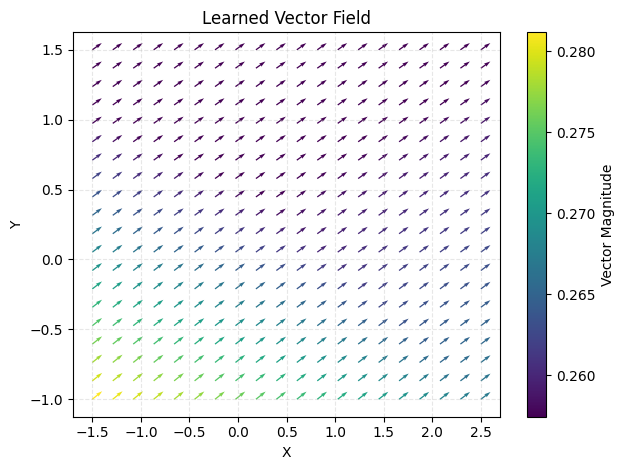

In [30]:
job_number = 11
fig = jobs[job_number].quiver_plot()
fig.show()

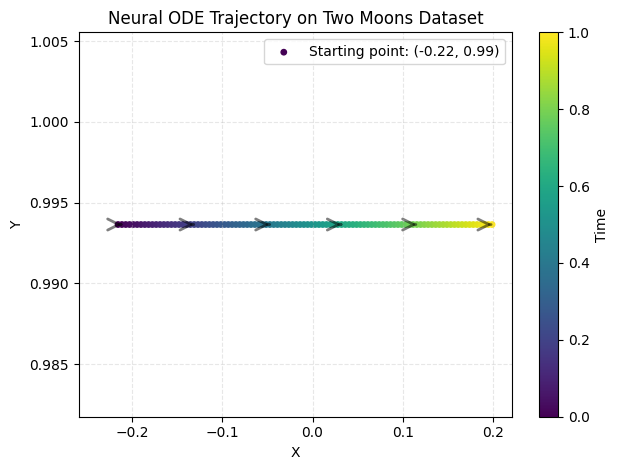

In [25]:
job_number = 220
sample = dataset_example.loc[0, ['x', 'y']].values.astype('float32').reshape(-1, 2)
time = np.linspace(0., 1., num=100, dtype='float32')
trajectory = jobs[job_number].model.trajectory(torch.from_numpy(sample),
                                      integration_times=torch.from_numpy(time))
trajectory = trajectory.squeeze(1)
trajectory = trajectory.detach().numpy()
num_arrows = 6
arrow_indices = np.linspace(0, trajectory.shape[0]-2, num=num_arrows, dtype='int')

fig, ax = plt.subplots()
ax.grid(alpha=.3, linestyle='--')
scatter = ax.scatter(trajectory[:, 0], trajectory[:, 1],
           s=np.full(trajectory.shape[0], 15),
           c=time,
           cmap='viridis',
           label=(f'Starting point: ({sample[0, 0]:.2f}, {sample[0, 1]:.2f})'))
plt.colorbar(scatter, ax=ax, label='Time')
for i in arrow_indices:
    if i == trajectory.shape[0] - 1:
        continue
    x = trajectory[i, 0]
    y = trajectory[i, 1]
    dx = trajectory[i+1, 0] - trajectory[i, 0]
    dy = trajectory[i+1, 1] - trajectory[i, 1]
    arrow = FancyArrowPatch((x, y),
                        (x + dx, y + dy),
                        arrowstyle='->',
                        mutation_scale=20,
                        color='k',
                        alpha=0.5,
                        linewidth=2)
    ax.add_patch(arrow)
ax.legend()
ax.set_title(
    'Neural ODE Trajectory on Two Moons Dataset',
    fontsize='large'
)
ax.set_xlabel('X', fontsize='medium')
ax.set_ylabel('Y', fontsize='medium')
# ax.set_ylim(0.993625, 0.993650)
fig.tight_layout()

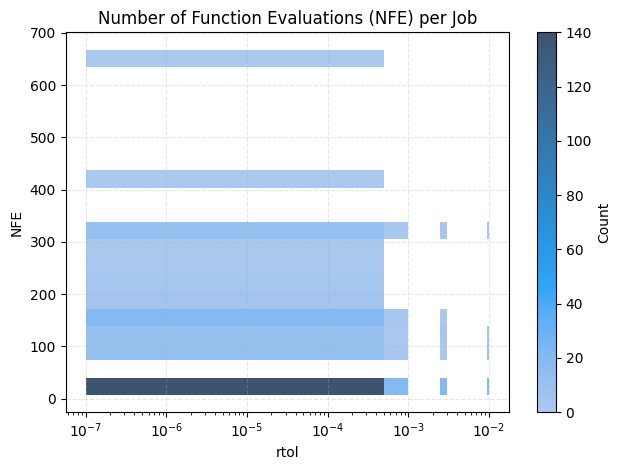

In [26]:
nfes = [
    job.metrics['test']['nfe']
    for job in jobs
]
fig, ax = plt.subplots()
ax.grid(alpha=.3, linestyle='--')
sns.histplot(
    jobs_df,
    x='model.rtol',
    y='metrics.test.nfe',
    ax=ax,
    cbar=True,
    cbar_kws={'label': 'Count'},
    bins=20
)
ax.set_title(
    'Number of Function Evaluations (NFE) per Job',
    fontsize='large'
)
ax.set_xlabel('rtol', fontsize='medium')
ax.set_ylabel('NFE', fontsize='medium')
ax.set_xscale('log')
fig.tight_layout()